///---
layout: post
title: "빛의 반사 및 굴절의 특성 유도"
comments: true
share: true
date: 2018-11-05 11:00:00
description: 빛이 반사(reflection) 또는 굴절(Snells's law of refraction) 될 때 특성을 sympy를 이용하여 유도한다.
tags: physics python sympy
toc: true
sitemap :
    changefreq : daily
    priority : 1.0
///---

# 빛의 반사 및 굴절의 특성 유도
Fermat의 원리[1]는 '빛은 최단 시간으로 이동할 수 있는 경로를 택한다'는 것으로 이 원리를 이용하여 반사 및 굴절의 특성을 유도한다.

## 빛의 반사 유도

빛의 반사 법칙은 그림 1에서 ${\theta}$(입사각)과 ${\phi}$(반사각)이 항상 같다는 것을 말한다.

<figure>
    <img src='../assets/images/reflection_refraction/reflection_dark.png' alt='빛의 반사' width="280" />
    <figcaption class="figure-caption">그림 1. 빛의 반사</figcaption>
</figure>

$$A=\left(x_1, y_1\right)$$

$$B=\left(x_2, y_2\right)$$

$$P=\left(x, 0\right)$$

빛은 최단 시간으로 이동할 수 있는 경로를 택한다는 특성[1]을 이용하면 ${\theta}$와 ${\phi}$가 같음을 보일 수 있다.  
  
A, B는 고정위치이고 P를 변하는 위치라고 가정하면 반사되는 빛의 이동경로는 APB가 된다.  
빛의 이동거리를 D=$|APB|$로 놓으면 빛의 이동 시간 $T=\left((n/c)D\right)$로 정리 할 수 있다.  
  
최단 시간을 가지는 P를 계산하기 위해서 T의 미분을 이용하여 T가 최소가 되는 x를 계산한다.

$$\frac{dt}{dx} = \left(\frac{n}{c}\frac{dD}{dx}\right)=0$$

이렇게 구한 x로 입사각과 반사각이 동일함을 보인다.

### 빛의 이동 거리(D)

In [1]:
# Show in Markdown
from IPython.display import display
from sympy.printing import latex
from IPython.display import Latex
from sympy import init_printing, symbols, sqrt, diff, solve, Abs, simplify
init_printing()

x = symbols('x', real=True)
x1, x2 = symbols('x_1 x_2', real=True, constant = True)
y1, y2 = symbols('y_1 y_2', positive=True, constant = True)

D = sqrt((x1 - x)**2 + y1**2) + sqrt((x2 - x)**2 + y2**2)
Latex('$$D=' + latex(D) + '$$')

<IPython.core.display.Latex object>

### D의 미분

In [2]:
# Show in Markdown
dD = diff(D, x)

In [3]:
Latex('$$\\frac{dD}{dx}=' + latex(dD) + '$$')

<IPython.core.display.Latex object>

### $\frac{dD}{dx}=0$ 으로 하는 x

In [4]:
# Show in Markdown
x_ans= solve(dD, x)

In [5]:
Latex('$$x=' + latex(x_ans) + '$$')

<IPython.core.display.Latex object>

첫번째 근은 $y_1$과 $y_2$가 같은 경우 발산하므로 제거한다.

In [6]:
# Show in Markdown
x_ans = x_ans[1]

### $\sin(\theta)$, $\sin(\phi)$

In [7]:
# Show in Markdown
sin_theta = sqrt((x1 - x_ans)**2 + y1**2) / Abs(x1 - x_ans)
sin_phi = sqrt((x2 - x_ans)**2 + y2**2) / Abs(x2 - x_ans)

In [8]:
Latex('$$\\sin({\\theta})=' + latex(sin_theta) + '$$')

<IPython.core.display.Latex object>

In [9]:
Latex('$$\\sin({\\phi})=' + latex(sin_phi) + '$$')

<IPython.core.display.Latex object>

### $\sin(\theta)$ / $\sin(\phi)$

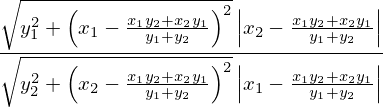

In [10]:
# Show in Markdown
display(sin_theta/sin_phi)

반사각과 입사각이 동일하다면 위의 결과가 1이 나와야 하는데 복잡한 결과가 도출되었다.  
이유는 sympy에서 simplify 명령 추가하지 않으면 수식을 정리하지 않기 때문이다.
simplify 이용하여 다시 결과를 뽑아보면 다음과 같다.

In [11]:
# Show in Markdown
display(simplify(sin_theta/sin_phi))

$\frac{\sin(\theta)}{\sin(\phi)} = 1$이므로 반사각과 입사각은 동일하다.

## 빛의 굴절 유도

<figure>
    <img src='../assets/images/reflection_refraction/refraction_dark.png' alt='빛의 굴절' width="280" />
    <figcaption class="figure-caption">그림 2. 빛의 굴절</figcaption>
</figure>

빛의 굴절은 다음과 같은 특성을 가진다.

$$n_1\sin\left(\theta\right) = n_2\sin\left(\phi\right)$$

빛의 굴절도 페르마의 정리를 이용하여 빛의 반사와 유사하게 유도한다.  
빛이 A에서 B까지 이동하는데 걸리는 시간 T는 아래와 같이 정리 된다.

$$T = \frac{n_1}{c}|AP| + \frac{n_2}{c}|PB|$$

$\frac{dT}{dx} = 0$에서 위의 수식을 확인한다.

# 빛의 이동 시간

In [12]:
# Show in Markdown
x = symbols('x', real=True)
x1, x2, y1, y2 = symbols('x_1 x_2 y_1 y_2', real=True, constant = True)
n1, n2, c = symbols('n_1 n_2 c', positive=True, constant = True)

T = (n1/c) * sqrt((x1 - x)**2 + y1**2) + (n2/c) * sqrt((x2 - x)**2 + y2**2)
Latex('$$T=' + latex(T) + '$$')

<IPython.core.display.Latex object>

### T의 미분

In [13]:
# Show in Markdown
dT = diff(T, x)

In [14]:
Latex('$$\\frac{dT}{dx}=' + latex(dT) + '=0$$')

<IPython.core.display.Latex object>

위의 수식은 빛의 굴절 공식과 동일하다.

## 참고자료
[1] https://ko.wikipedia.org/wiki/%ED%8E%98%EB%A5%B4%EB%A7%88%EC%9D%98_%EC%9B%90%EB%A6%AC